In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

# 데이터 로드

In [2]:
data = pd.read_csv('/project/data/폐렴환자lab.csv')
data

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,NaN
...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,abnormal


In [3]:
#시간 부분 제거, date 부분만 남김
import datetime as dt
data['CHARTTIME'] = pd.to_datetime(data['CHARTTIME'])
data['CHARTTIME'] = data['CHARTTIME'].dt.date

In [4]:
data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14,NaN
1,5145,9,150750.0,50820,2149-11-14,NaN
2,5146,9,150750.0,50821,2149-11-14,abnormal
3,5147,9,150750.0,50826,2149-11-14,NaN
4,5148,9,150750.0,50827,2149-11-14,NaN


# 중복제거
- 이전과 다르게 time 전처리 후 중복제거

In [5]:
print("제거할 데이터 개수:", data.duplicated().sum())
print("중복 제거 전 shape:", data.shape)

data.drop_duplicates(inplace=True)
print("모두 중복되는 샘플 제거 후 shape:", data.shape)

제거할 데이터 개수: 0
중복 제거 전 shape: (9356349, 6)
모두 중복되는 샘플 제거 후 shape: (9356349, 6)


In [6]:
data = data.sort_values(['SUBJECT_ID','CHARTTIME']).reset_index(drop=True)
data = data.set_index('SUBJECT_ID').drop('ROW_ID', axis=1)
data

,HADM_ID,ITEMID,CHARTTIME,FLAG
SUBJECT_ID,,,,
9,150750.0,50856,2149-11-09,NaN
9,150750.0,50868,2149-11-09,NaN
9,150750.0,50879,2149-11-09,NaN
9,150750.0,50880,2149-11-09,NaN
9,150750.0,50882,2149-11-09,abnormal
...,...,...,...,...
99985,NaN,51006,2182-03-14,abnormal
99985,NaN,51146,2182-03-14,NaN
99985,NaN,51200,2182-03-14,NaN


# dict 생성 (sub, item, final_date)

In [7]:
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{9: 0,
 21: 1,
 31: 2,
 36: 3,
 37: 4,
 41: 5,
 68: 6,
 85: 7,
 94: 8,
 101: 9,
 103: 10,
 105: 11,
 109: 12,
 111: 13,
 112: 14,
 117: 15,
 124: 16,
 136: 17,
 148: 18,
 156: 19,
 157: 20,
 164: 21,
 166: 22,
 175: 23,
 177: 24,
 184: 25,
 186: 26,
 188: 27,
 191: 28,
 203: 29,
 208: 30,
 211: 31,
 214: 32,
 221: 33,
 222: 34,
 223: 35,
 224: 36,
 225: 37,
 231: 38,
 242: 39,
 248: 40,
 252: 41,
 253: 42,
 268: 43,
 269: 44,
 274: 45,
 283: 46,
 286: 47,
 290: 48,
 303: 49,
 305: 50,
 308: 51,
 323: 52,
 328: 53,
 330: 54,
 346: 55,
 356: 56,
 357: 57,
 360: 58,
 364: 59,
 366: 60,
 368: 61,
 370: 62,
 391: 63,
 404: 64,
 412: 65,
 423: 66,
 425: 67,
 426: 68,
 433: 69,
 434: 70,
 450: 71,
 452: 72,
 453: 73,
 457: 74,
 458: 75,
 481: 76,
 482: 77,
 492: 78,
 497: 79,
 499: 80,
 505: 81,
 507: 82,
 508: 83,
 509: 84,
 510: 85,
 514: 86,
 518: 87,
 530: 88,
 536: 89,
 538: 90,
 544: 91,
 546: 92,
 550: 93,
 565: 94,
 571: 95,
 576: 96,
 580: 97,
 586: 98,
 592: 99,
 596: 100,
 605: 101

In [8]:
dic_item2idx = {}
for i,j in enumerate(data['ITEMID'].sort_values().unique()):
    dic_item2idx[j] = i
dic_item2idx

{50800: 0,
 50801: 1,
 50802: 2,
 50803: 3,
 50804: 4,
 50805: 5,
 50806: 6,
 50808: 7,
 50809: 8,
 50810: 9,
 50811: 10,
 50812: 11,
 50813: 12,
 50814: 13,
 50815: 14,
 50816: 15,
 50817: 16,
 50818: 17,
 50819: 18,
 50820: 19,
 50821: 20,
 50822: 21,
 50823: 22,
 50824: 23,
 50825: 24,
 50826: 25,
 50827: 26,
 50828: 27,
 50829: 28,
 50830: 29,
 50831: 30,
 50832: 31,
 50835: 32,
 50836: 33,
 50837: 34,
 50838: 35,
 50839: 36,
 50840: 37,
 50841: 38,
 50842: 39,
 50843: 40,
 50844: 41,
 50845: 42,
 50847: 43,
 50848: 44,
 50849: 45,
 50850: 46,
 50851: 47,
 50852: 48,
 50853: 49,
 50854: 50,
 50855: 51,
 50856: 52,
 50857: 53,
 50858: 54,
 50859: 55,
 50860: 56,
 50861: 57,
 50862: 58,
 50863: 59,
 50864: 60,
 50865: 61,
 50866: 62,
 50867: 63,
 50868: 64,
 50869: 65,
 50870: 66,
 50871: 67,
 50872: 68,
 50873: 69,
 50874: 70,
 50875: 71,
 50876: 72,
 50877: 73,
 50878: 74,
 50879: 75,
 50880: 76,
 50881: 77,
 50882: 78,
 50883: 79,
 50884: 80,
 50885: 81,
 50886: 82,
 50887: 83,
 5

## admission - final

In [9]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [10]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

In [11]:
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{9: datetime.date(2149, 11, 14),
 21: datetime.date(2135, 2, 8),
 31: datetime.date(2108, 8, 30),
 36: datetime.date(2134, 5, 20),
 37: datetime.date(2183, 8, 26),
 41: datetime.date(2133, 1, 27),
 68: datetime.date(2174, 1, 19),
 85: datetime.date(2167, 7, 30),
 94: datetime.date(2176, 9, 25),
 101: datetime.date(2196, 10, 12),
 103: datetime.date(2144, 9, 1),
 105: datetime.date(2189, 2, 25),
 109: datetime.date(2142, 8, 30),
 111: datetime.date(2144, 7, 1),
 112: datetime.date(2196, 9, 29),
 117: datetime.date(2133, 12, 1),
 124: datetime.date(2166, 2, 1),
 136: datetime.date(2103, 5, 14),
 148: datetime.date(2107, 10, 8),
 156: datetime.date(2121, 1, 27),
 157: datetime.date(2106, 6, 24),
 164: datetime.date(2117, 1, 16),
 166: datetime.date(2105, 1, 24),
 175: datetime.date(2184, 1, 31),
 177: datetime.date(2125, 12, 12),
 184: datetime.date(2168, 5, 13),
 186: datetime.date(2176, 10, 1),
 188: datetime.date(2162, 1, 17),
 191: datetime.date(2196, 4, 21),
 203: datetime.date(2160,

## length

In [12]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  7799
dic_item2idx length :  690
dic_sub2final_date length :  7799


# 생성

In [13]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,30,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 30

    if (dateidx < 0) or (dateidx > 29) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.22980024417241415 분
1221623.0


In [14]:
x.shape

(7799, 30, 690)

In [15]:
label = np.load("3d_array_label.npy")

In [16]:
# 6240을 기준으로 split
X_train = x[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = x[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 30, 690), (6240, 1), (1559, 30, 690), (1559, 1))

# 시계열 - LSTM1

In [24]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [25]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, x.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 12)            33744     
_________________________________________________________________
lstm_3 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 36ms/step - loss: 0.8200 - acc: 0.5159 - val_loss: 0.8180 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 1s 22ms/step - loss: 0.6749 - acc: 0.6870 - val_loss: 0.7988 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 1s 22ms/step - loss: 0.6292 - acc: 0.6928 - val_loss: 0.7515 - val_acc: 0.5237
Epoch 4/200
37/37 [==============================] - 1s 22ms/step - loss: 0.5920 - acc: 0.7152 - val_loss: 0.7093 - val_acc: 0.6051
Epoch 5/200
37/37 [==============================] - 1s 22ms/step - loss: 0.5646 - acc: 0.7411 - val_loss: 0.7387 - val_acc: 0.5878
Epoch 6/200
37/37 [==============================] - 1s 22ms/step - loss: 0.5637 - acc: 0.7451 - val_loss: 0.6912 - val_acc: 0.6372
Epoch 7/200
37/37 [==============================] - 1s 22ms/step - loss: 0.5558 - acc: 0.7511 - val_loss: 0.7183 - val_acc: 0.6192
Epoch 8/200
37/37 [==============================] - 1s 21ms/step - loss: 0.

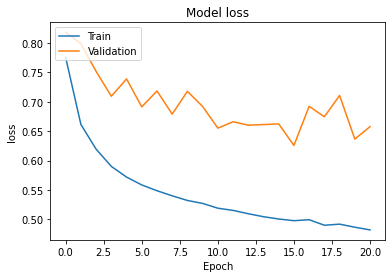

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

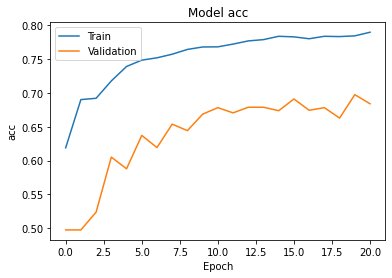

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [30]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6754329698524695


# 시계열 - LSTM2

In [31]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=50, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True))
lstm.add(LSTM(units=50, activation='tanh', input_shape=(12, x.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 50)            148200    
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 168,451
Trainable params: 168,451
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 4s 55ms/step - loss: 0.6196 - acc: 0.6721 - val_loss: 0.7108 - val_acc: 0.5590
Epoch 2/200
37/37 [==============================] - 2s 42ms/step - loss: 0.5400 - acc: 0.7148 - val_loss: 0.7040 - val_acc: 0.5654
Epoch 3/200
37/37 [==============================] - 2s 42ms/step - loss: 0.4973 - acc: 0.7604 - val_loss: 0.6596 - val_acc: 0.6141
Epoch 4/200
37/37 [==============================] - 2s 42ms/step - loss: 0.4905 - acc: 0.7533 - val_loss: 0.6319 - val_acc: 0.6635
Epoch 5/200
37/37 [==============================] - 2s 42ms/step - loss: 0.4640 - acc: 0.7796 - val_loss: 0.6242 - val_acc: 0.6635
Epoch 6/200
37/37 [==============================] - 2s 42ms/step - loss: 0.4632 - acc: 0.7723 - val_loss: 0.6150 - val_acc: 0.6679
Epoch 7/200
37/37 [==============================] - 2s 42ms/step - loss: 0.4552 - acc: 0.7801 - val_loss: 0.6389 - val_acc: 0.6705
Epoch 8/200
37/37 [==============================] - 2s 43ms/step - loss: 0.

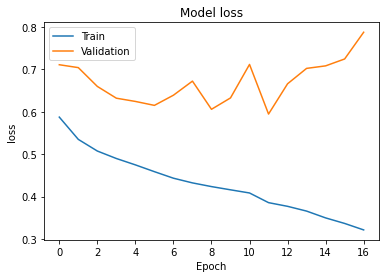

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

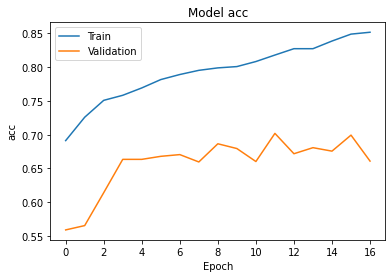

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [36]:
pred.shape

(1559, 1)

In [37]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6529826812059012


# 2차원 시계열 X

In [39]:
arr = x
arr.shape

(7799, 30, 690)

In [41]:
arr[0,:,:].sum(axis=1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
       16.,  9.,  8., 17.])

In [42]:
arr_2d = []
for i in range(len(arr)):
    for k in arr[i,:,:].sum(axis=1):
        if k>0:
            k=1
        arr_2d.append(k)
arr_2d = np.array(arr_2d)

In [45]:
arr_2d = arr_2d.reshape(-1,30)
arr_2d.shape

(7799, 30)

# 모델적용

In [46]:
# 5460 기준으로 나눔
i = 5460
x_train = arr_2d[:i,:]
y_train = label[:i]
x_test = arr_2d[i:,:]
y_test = label[i:]

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5460, 30), (5460, 1), (2339, 30), (2339, 1))

In [56]:
model = Sequential()
model.add(Dense(256, input_dim=30, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [57]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])

Epoch 1/200
32/32 [==============================] - 1s 5ms/step - loss: 0.6270 - acc: 0.6918 - val_loss: 0.6994 - val_acc: 0.5861
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6091 - acc: 0.6965 - val_loss: 0.6983 - val_acc: 0.5861
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6101 - acc: 0.6978 - val_loss: 0.7007 - val_acc: 0.5861
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6047 - acc: 0.6973 - val_loss: 0.7086 - val_acc: 0.5861
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5912 - acc: 0.7110 - val_loss: 0.6931 - val_acc: 0.5846
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6041 - acc: 0.6975 - val_loss: 0.7036 - val_acc: 0.5861
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6012 - acc: 0.6954 - val_loss: 0.7333 - val_acc: 0.5861
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6029 - a

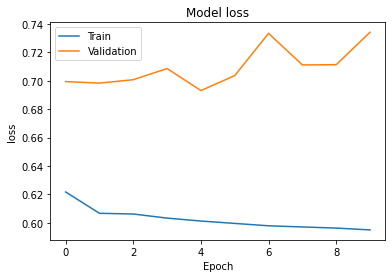

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

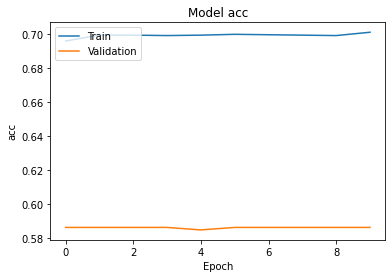

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
pred = model.predict(x_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [61]:
y_test.shape

(2339, 1)

In [62]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.4754168448054724
